# **Exploratory Data Analysis (EDA) for Mars Weather Analysis**

## **1. Introduction**
### **Dataset Overview**
- The dataset consists of Martian weather data collected by the **REMS instrument on NASA's Curiosity rover**.
- It contains **3,197 records** spanning multiple Martian years, with variables covering **temperature, pressure, UV radiation, and day length**.

### **Objectives of EDA**
- Understand feature relationships and trends.
- Identify missing data patterns and their impact.
- Investigate seasonal and cyclical trends.
- Detect outliers and anomalies.

### **Key Questions to Explore**
- Are temperature and pressure correlated?
- Can features predict missing values?
- How do seasonal and yearly trends affect Martian weather?
- What role does **day length** play in temperature variations?
- Are there **outliers or extreme events** in the dataset?

### EDA TO DO LIST
- [ ] Investigate each feature in my dataframe
- [ ] Pearson correlation coefficients plots
- [ ] Hypothesis testing and establishment of probing questions
1. Are temperature and pressure correlated?
2. Can any of the features be used to predict the gaps in the data?
- [ ] Identify if there are any years with complete sol records, this will be the primary training dataset
- [ ] Look at seasonal trends for primary features
- [ ] Look into seasonal changes in variation between min and max temperatures
- [ ] Look into distributions of missing days and data (from original dataset)

---

## **2. Data Overview**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### **2.1 Load and Inspect Data**
- Load the dataset (`pd.read_csv()`).
- Display first few rows (`df.head()`).
- Check data structure (`df.info()`) and column data types.
- Convert date columns to datetime format (`pd.to_datetime()`).

In [2]:
mars_df = pd.read_csv('../Datasets/mars_weather_cleaned.csv', index_col='sol_number')
mars_df.head()

,earth_date_time,Ls,mars_month,mars_year,mars_season,sunrise,sunset,day_length,avg_ground_temp,max_ground_temp,min_ground_temp,avg_air_temp,max_air_temp,min_air_temp,mean_pressure,UV_Radiation
sol_number,,,,,,,,,,,,,,,,
1,2012-08-07,150.0,6,1,winter,05:30:00,17:22:00,712.0,-45.5,-16.0,-75.0,-37.5,8.0,-83.0,739.0,4
9,2012-08-15,155.0,6,1,winter,05:28:00,17:22:00,714.0,-45.5,-16.0,-75.0,-37.5,8.0,-83.0,739.0,4
10,2012-08-16,155.0,6,1,winter,05:28:00,17:22:00,714.0,-45.5,-16.0,-75.0,-37.5,8.0,-83.0,739.0,4
11,2012-08-17,156.0,6,1,winter,05:28:00,17:21:00,713.0,-43.5,-11.0,-76.0,-37.0,9.0,-83.0,740.0,4
12,2012-08-18,156.0,6,1,winter,05:28:00,17:21:00,713.0,-47.0,-18.0,-76.0,-37.0,8.0,-82.0,741.0,4


### **2.2 Summary Statistics**
- Generate summary statistics (`df.describe()`).
- Identify potential outliers and missing values.

In [3]:
mars_df.describe()

,Ls,mars_month,mars_year,day_length,avg_ground_temp,max_ground_temp,min_ground_temp,avg_air_temp,max_air_temp,min_air_temp,mean_pressure,UV_Radiation
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,166.959962,6.083203,3.507038,718.169221,-44.097279,-13.182828,-75.011730,-39.147357,2.011730,-80.306537,828.997028,2.583359
std,104.356771,3.466172,1.500218,12.036363,7.401663,10.489177,5.529929,7.262277,9.398862,8.824723,57.224328,0.692132
min,0.000000,1.000000,1.000000,702.000000,-72.500000,-67.000000,-100.000000,-75.500000,-61.000000,-136.000000,702.000000,1.000000
25%,78.000000,3.000000,2.000000,707.000000,-50.500000,-23.000000,-79.000000,-45.500000,-6.000000,-86.000000,785.000000,2.000000
50%,156.000000,6.000000,3.000000,716.000000,-43.000000,-12.000000,-75.000000,-38.000000,3.000000,-80.000000,844.000000,3.000000
75%,254.000000,9.000000,5.000000,730.000000,-37.500000,-4.000000,-71.000000,-33.000000,10.000000,-75.000000,873.000000,3.000000
max,359.000000,12.000000,6.000000,738.000000,-26.500000,11.000000,-52.000000,-1.500000,24.000000,-8.000000,925.000000,4.000000


In [4]:
mars_df.dtypes

earth_date_time     object
Ls                 float64
mars_month           int64
mars_year            int64
mars_season         object
sunrise             object
sunset              object
day_length         float64
avg_ground_temp    float64
max_ground_temp    float64
min_ground_temp    float64
avg_air_temp       float64
max_air_temp       float64
min_air_temp       float64
mean_pressure      float64
UV_Radiation         int64
dtype: object

### **2.3 Missing Data Analysis**
- **Count missing values** per column (`df.isnull().sum()`).
- **Visualize missing data**:
  - `msno.matrix(df)` to see patterns in missing values.
  - `msno.heatmap(df)` to explore correlations between missing features.
- **Identify patterns in missing data**:
  - Check if missing data is seasonal (`sns.heatmap(df.pivot_table(index='mars_month', columns='mars_year', values='avg_air_temp', aggfunc='count'))`).

<Axes: xlabel='mars_year', ylabel='mars_month'>

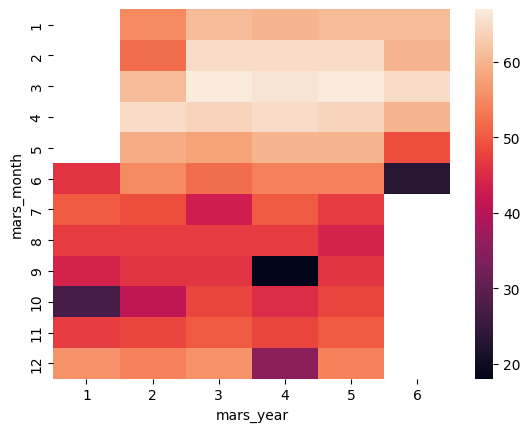

In [5]:
sns.heatmap(mars_df.pivot_table(index='mars_month', columns='mars_year', values='avg_air_temp', aggfunc='count'))

---

## **3. Feature Investigation**

### **3.1 Univariate Analysis (Distributions & Trends)**
- **Histograms** (`sns.histplot()`) for:
  - `avg_air_temp`, `max_air_temp`, `min_air_temp`
  - `avg_ground_temp`, `max_ground_temp`, `min_ground_temp`
  - `mean_pressure`, `UV_Radiation`, `day_length`
- **Boxplots** (`sns.boxplot()`) to detect outliers.

In [6]:
mars_df.loc[3020:3026]

,earth_date_time,Ls,mars_month,mars_year,mars_season,sunrise,sunset,day_length,avg_ground_temp,max_ground_temp,min_ground_temp,avg_air_temp,max_air_temp,min_air_temp,mean_pressure,UV_Radiation
sol_number,,,,,,,,,,,,,,,,
3020,2021-02-03,357.0,12,5,summer,06:42:00,18:42:00,720.0,-40.5,-7.0,-74.0,-34.5,7.0,-76.0,817.0,2
3021,2021-02-04,358.0,12,5,summer,06:42:00,18:42:00,720.0,-40.0,-6.0,-74.0,-41.0,7.0,-89.0,819.0,2
3022,2021-02-05,358.0,12,5,summer,06:41:00,18:41:00,720.0,-37.5,-2.0,-73.0,-36.0,6.0,-78.0,818.0,2
3023,2021-02-06,359.0,12,5,summer,06:41:00,18:41:00,720.0,-44.5,-15.0,-74.0,-36.0,7.0,-79.0,818.0,2
3025,2021-02-08,0.0,1,6,autumn,06:41:00,18:40:00,719.0,-40.0,-6.0,-74.0,-39.5,6.0,-85.0,820.0,2
3026,2021-02-09,0.0,1,6,autumn,06:40:00,18:40:00,720.0,-40.5,-7.0,-74.0,-42.5,6.0,-91.0,820.0,2


In [7]:
# Ensure the dataframe is sorted by sol index
mars_df = mars_df.sort_index()

# Initialize storage for yearly data and missing gaps
yearly_dfs = {}
missing_gaps = []

# Get unique Mars years
mars_years = mars_df['mars_year'].unique()

for year in mars_years:
    # Filter for a single Mars year
    df_year = mars_df[mars_df['mars_year'] == year]
    
    # Get actual sols recorded
    recorded_sols = sorted(df_year.index)

    # Check for missing gaps
    for i in range(len(recorded_sols) - 1):
        current_sol = recorded_sols[i]
        next_sol = recorded_sols[i + 1]

        if next_sol != current_sol + 1:  # A gap is present
            gap_start = current_sol + 1
            gap_end = next_sol - 1
            gap_size = gap_end - gap_start + 1

            # Store gap info
            missing_gaps.append({
                "mars_year": year,
                "gap_start": gap_start,
                "gap_end": gap_end,
                "gap_size": gap_size
            })

    # Store each year's DataFrame
    yearly_dfs[year] = df_year

# Convert missing gaps data into a DataFrame
missing_gaps_df = pd.DataFrame(missing_gaps)

# Display summary of missing gaps
print("Missing Sol Gaps Information:")
print(missing_gaps_df)


Missing Sol Gaps Information:
    mars_year  gap_start  gap_end  gap_size
0           1          2        8         7
1           1        193      194         2
2           1        201      214        14
3           1        216      221         6
4           1        263      266         4
5           2        359      364         6
6           2        445      453         9
7           2        458      461         4
8           2        479      484         6
9           2        873      879         7
10          2        938      938         1
11          2        955      956         2
12          2        999      999         1
13          3       1027     1027         1
14          3       1289     1290         2
15          3       1389     1397         9
16          4       1691     1691         1
17          4       1786     1786         1
18          4       2175     2203        29
19          4       2215     2215         1
20          4       2259     2260         2
21

### **3.2 Bivariate Analysis (Feature Relationships)**
- **Scatter plots** (`sns.scatterplot()`):
  - `avg_air_temp` vs. `mean_pressure`
  - `avg_ground_temp` vs. `UV_Radiation`
  - `day_length` vs. `max_air_temp`
- **Boxplots by categorical variables**:
  - Seasonal temperature variation: `sns.boxplot(x='mars_season', y='avg_air_temp')`
  - Monthly pressure changes: `sns.boxplot(x='mars_month', y='mean_pressure')`

In [8]:
#sns.boxplot(x='mars_month', y='avg_air_temp')

---

## **4. Correlation Analysis**

### **4.1 Pearson Correlation**
- Compute **correlation matrix** (`df.corr()`).
- **Heatmap of correlations** (`sns.heatmap(df.corr(), annot=True, cmap='coolwarm')`).
- Investigate relationships:
  - `avg_air_temp` vs. `mean_pressure`
  - `max_air_temp` vs. `UV_Radiation`
  - `day_length` vs. `temperature`

<Axes: >

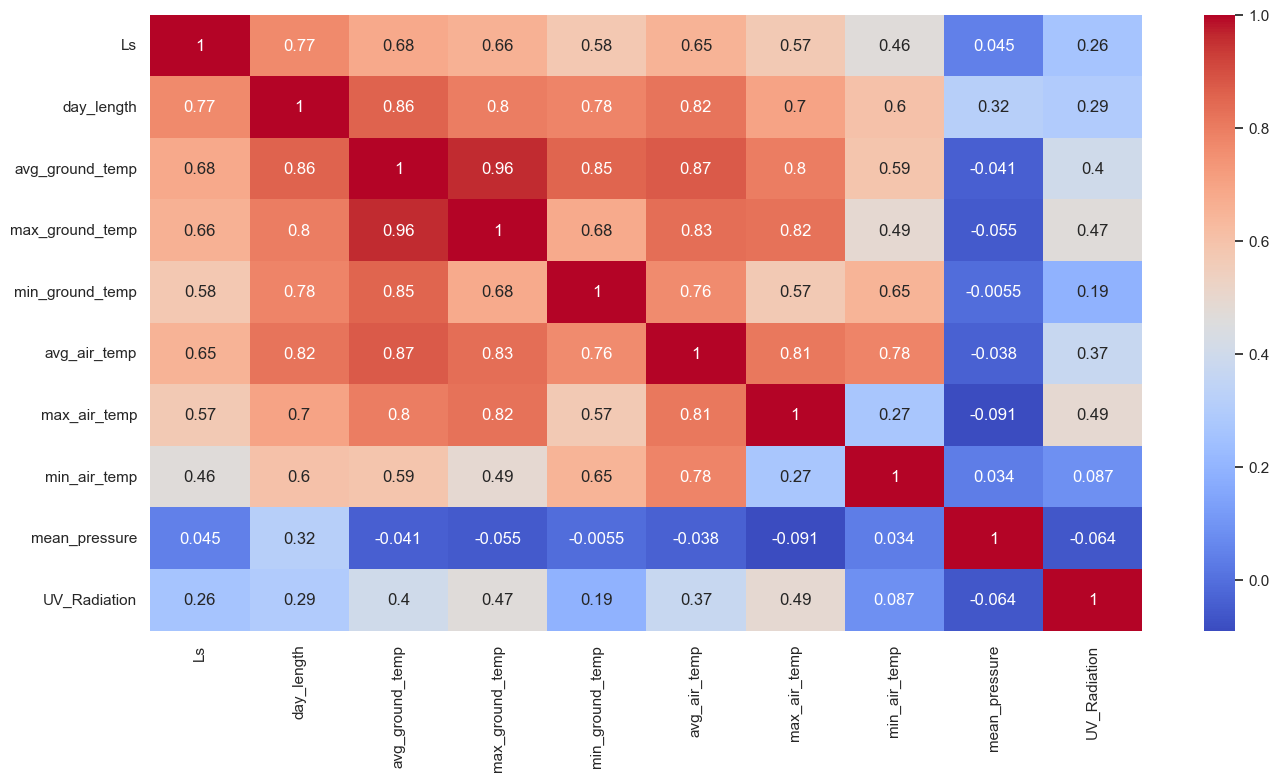

In [9]:
sns.set(rc={"figure.figsize":(16, 8)})
features = ['Ls',
            'day_length', 
            'avg_ground_temp', 
            'max_ground_temp',
            'min_ground_temp', 
            'avg_air_temp', 
            'max_air_temp', 
            'min_air_temp',
            'mean_pressure', 
            'UV_Radiation']
corr = mars_df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### **4.2 Pairwise Comparisons**
- **Pair plot visualization** (`sns.pairplot(df[['avg_air_temp', 'mean_pressure', 'UV_Radiation']])`).
- Check for **nonlinear relationships** using **Spearman correlation**.

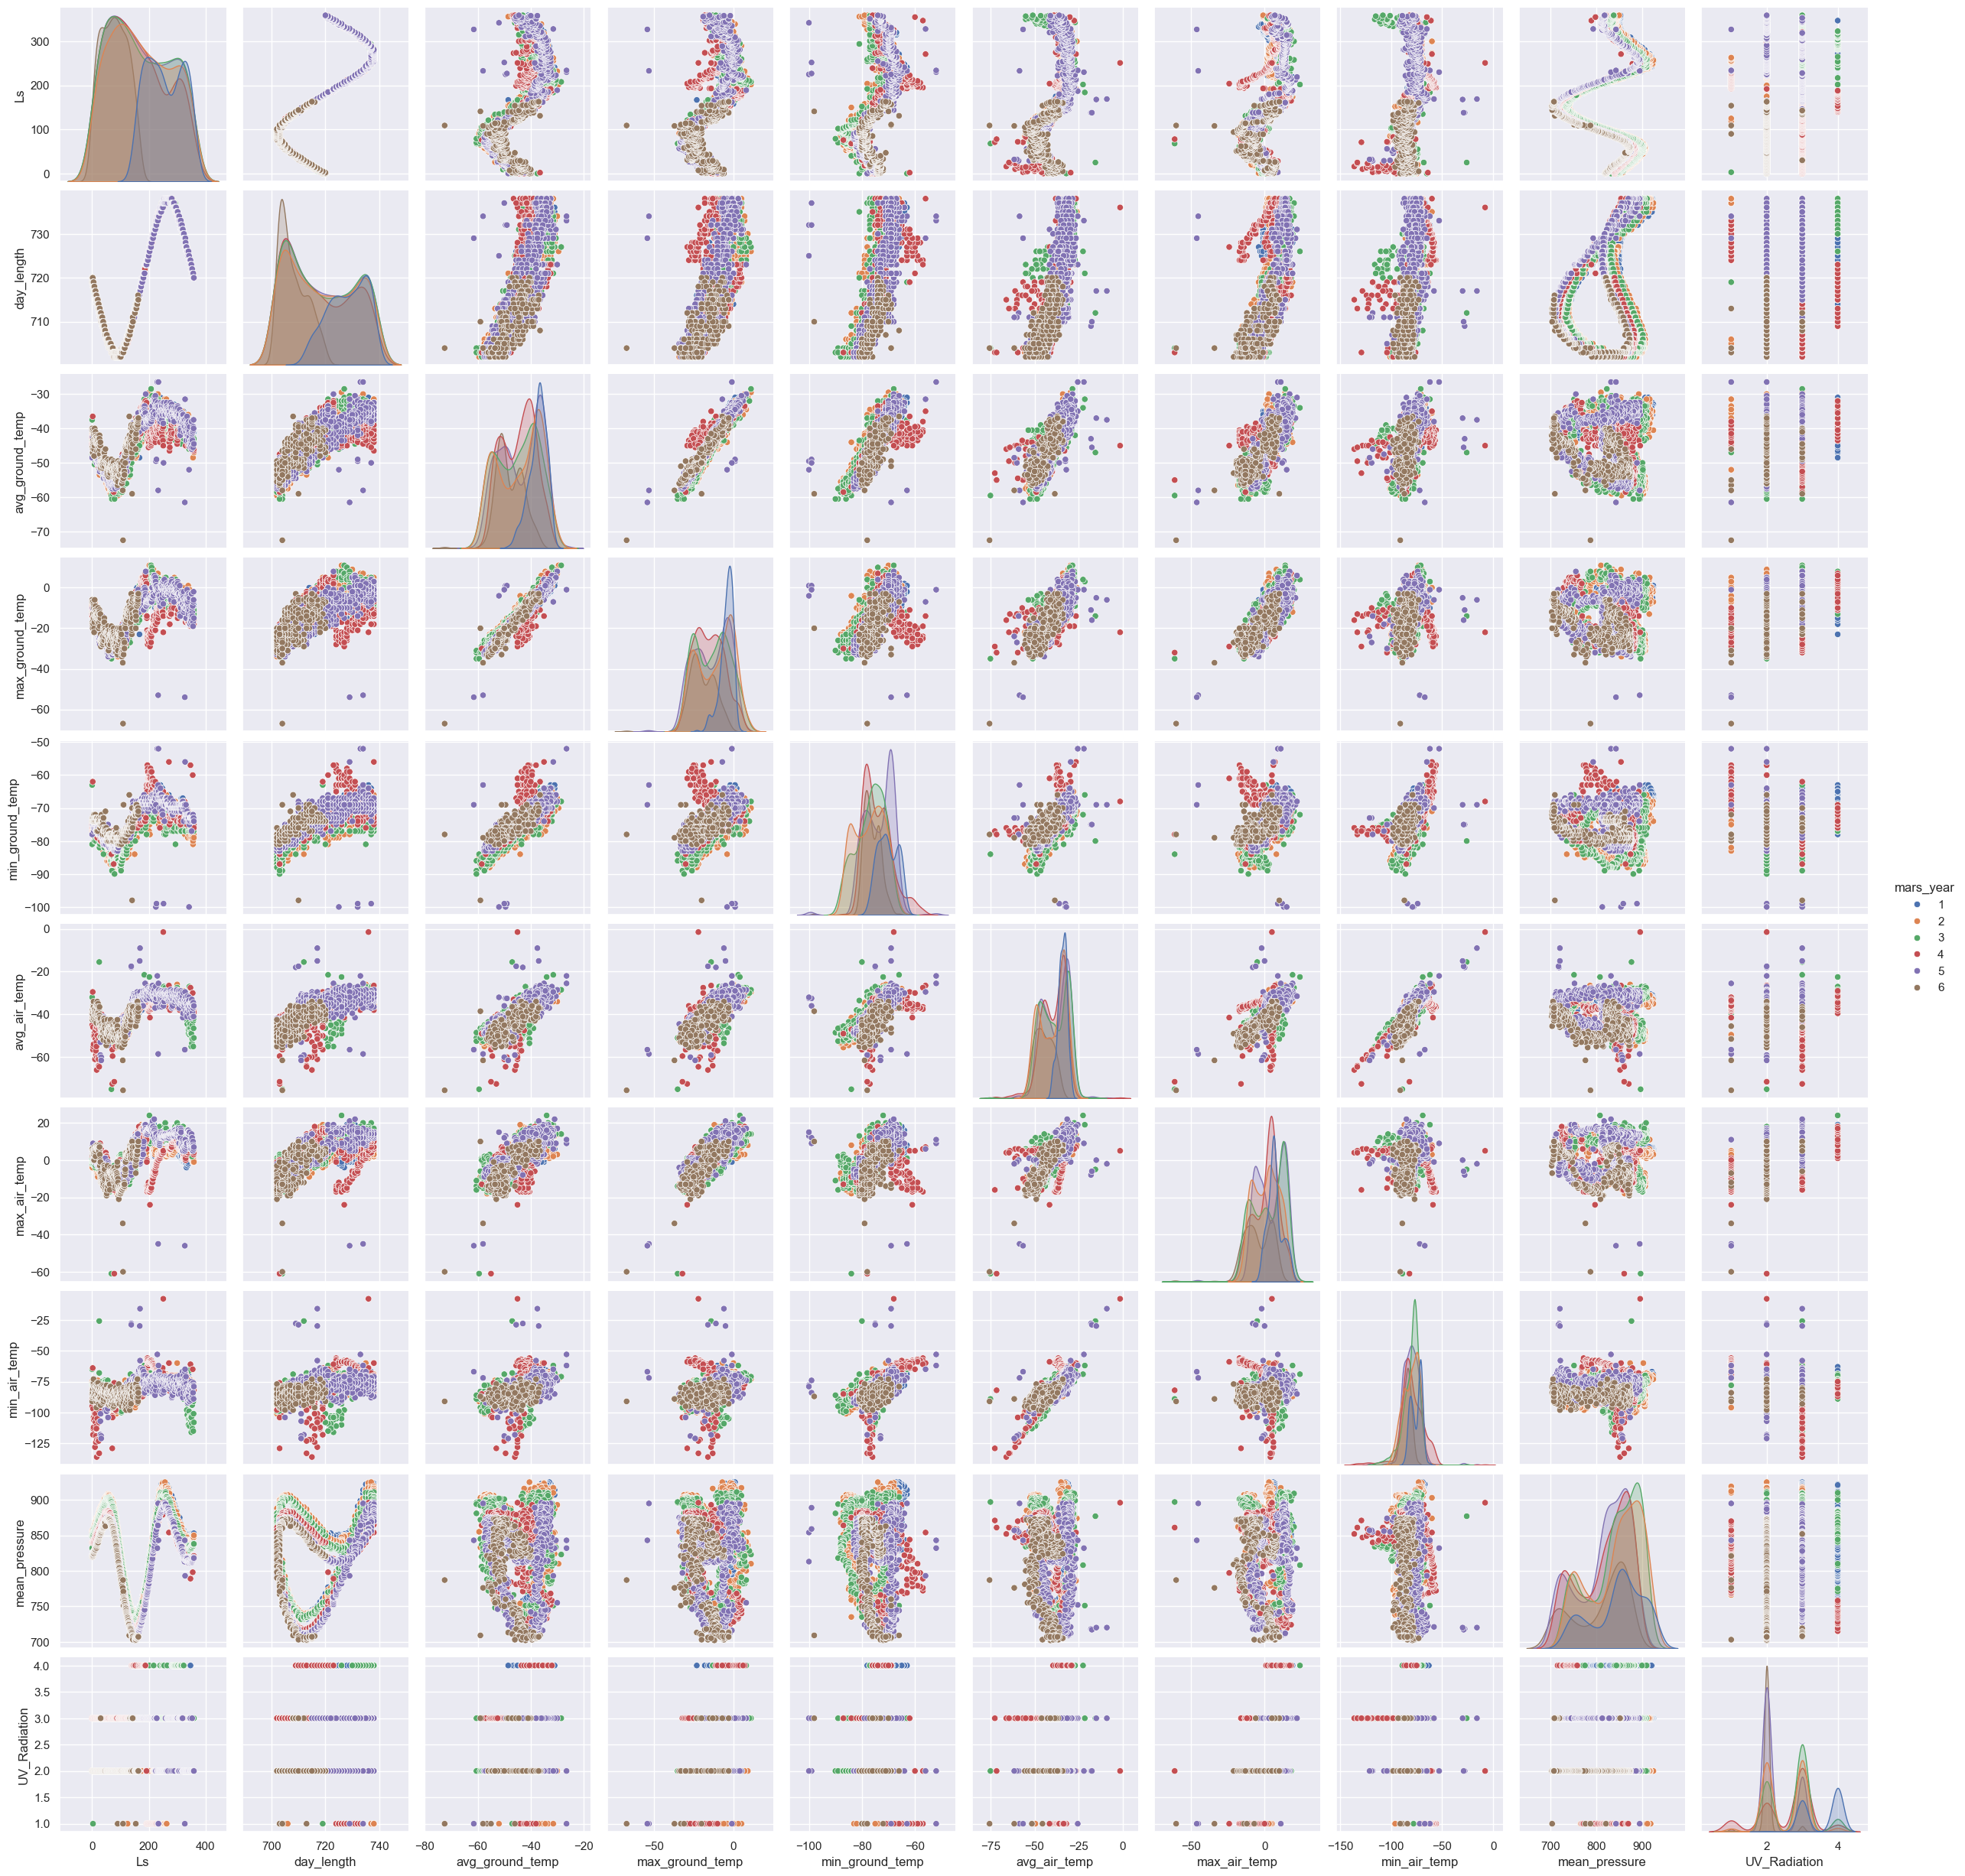

In [10]:
sns.pairplot(mars_df[features + ['mars_year']], hue='mars_year', palette='deep')

---

## **5. Missing Data Analysis**

### **5.1 Investigating Missing Patterns**
- **Time-series visualization** of missing values:
  - `df.groupby('mars_year').apply(lambda x: x.isnull().sum())`
  - Plot missing values over time using `sns.heatmap()`.

### **5.2 Predicting Missing Data**
- **Regression-based approaches**:
  - Use **Linear Regression or KNN Imputation** to check if missing values can be estimated using other variables.
- **Hypothesis Testing**:
  - Compare distributions of missing vs. non-missing data (`sns.boxplot(x='Missing', y='avg_air_temp')`).
  - Perform **t-tests** (`scipy.stats.ttest_ind()`) to check if missing data follows systematic trends.

---

## **6. Cyclical Trends: Seasonal and Yearly Patterns**

### **6.1 Identify Years with Complete Sol Records**
- **Check completeness**:  
  - `df.groupby('mars_year')['earth_date_time'].count()`
  - Filter for years with **full sol records**.

### **6.2 Seasonal Variability**
- **Line plots** of monthly trends:
  - `sns.lineplot(x='mars_month', y='avg_air_temp', hue='mars_year', data=df)`
- **Compare seasons**:
  - `sns.boxplot(x='mars_season', y='avg_air_temp', data=df)`

---

## **7. Day Length vs. Temperature Relationship**
- **Scatter Plots**:
  - `sns.scatterplot(x='day_length', y='max_ground_temp', data=df)`
- **Correlation Test** (`scipy.stats.pearsonr(df['day_length'], df['max_air_temp'])`).

---

## **8. UV Radiation and Atmospheric Conditions**
- **UV vs. Temperature**: `sns.scatterplot(x='UV_Radiation', y='avg_air_temp')`.
- **Seasonal UV Levels**: `sns.boxplot(x='mars_season', y='UV_Radiation')`.
- **Correlation Analysis**:
  - `df[['UV_Radiation', 'avg_air_temp', 'mean_pressure']].corr()`

<Axes: >

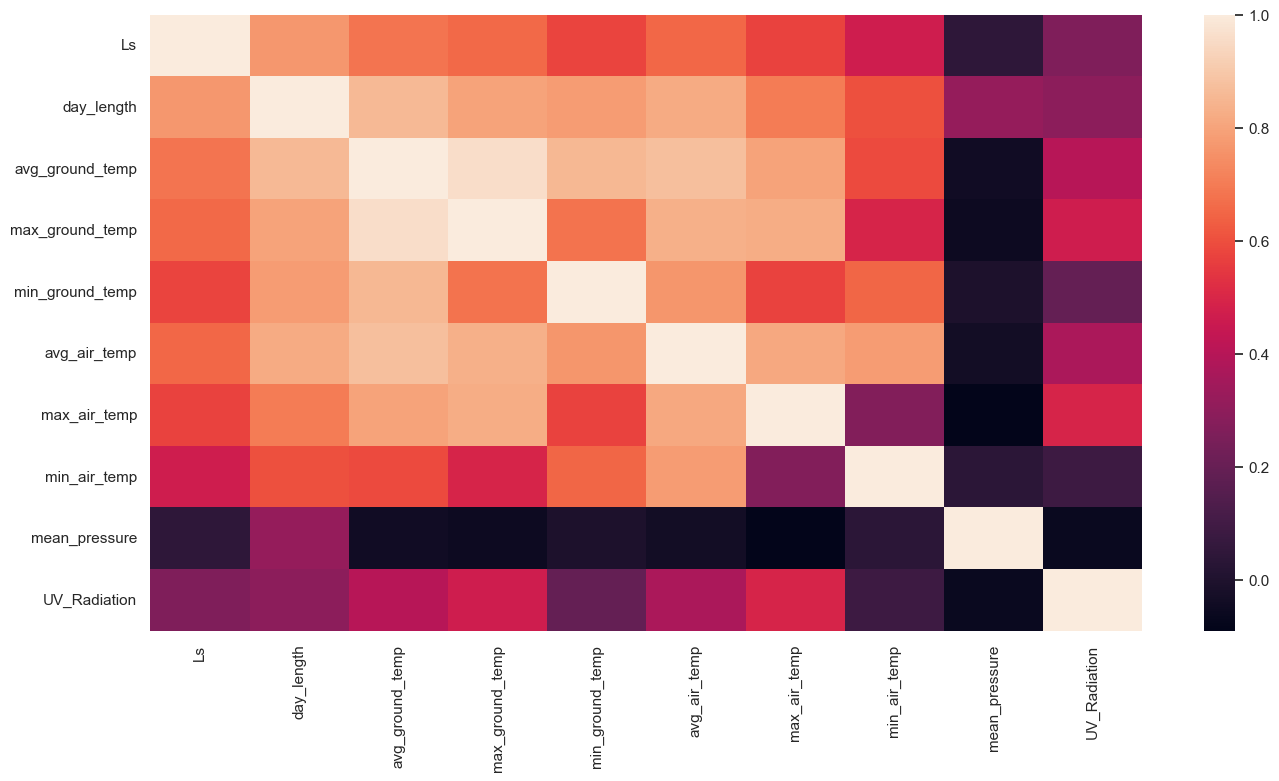

In [11]:
sns.heatmap(mars_df[features].corr())

---

## **9. Differences Between Air & Ground Temperatures**
- Compute **temperature gap**:
  - `df['temp_gap'] = df['avg_ground_temp'] - df['avg_air_temp']`
- **Visualize over time**: `sns.lineplot(x='mars_month', y='temp_gap', data=df)`.
- **Seasonal Variability**:
  - Boxplots for temp gaps across seasons.

---

## **10. Long-Term Trends Over Martian Years**
- **Rolling averages** to smooth trends:
  - `df['mean_pressure'].rolling(window=30).mean().plot()`
- **Compare yearly distributions**:
  - `sns.boxplot(x='mars_year', y='mean_pressure', data=df)`

---

## **11. Outlier and Anomaly Detection**
- **Boxplots for outliers**: `sns.boxplot(x=df['mean_pressure'])`.
- **Z-Score Analysis**:
  - `df['z_score'] = (df['mean_pressure'] - df['mean_pressure'].mean()) / df['mean_pressure'].std()`
  - Identify extreme z-scores (`df[df['z_score'] > 3]`).

---

## **12. Hypothesis Testing**

### **12.1 Are Temperature and Pressure Correlated?**
- **Null Hypothesis (H₀):** No correlation.
- **Alternative Hypothesis (H₁):** There is a correlation.
- **Statistical Test**:
  - Pearson correlation test (`scipy.stats.pearsonr()`).

### **12.2 Can Features Predict Missing Data?**
- Compare distributions using **t-tests**.
- Explore regression-based imputation.

---

## **13. Summary of Findings & Next Steps**
- **Key insights**: Seasonal trends, missing data impact, correlations, anomalies.
- **Potential next steps**:
  - Feature engineering.
  - Model selection for missing data prediction.
  - Time-series forecasting models.